In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Credit card transactions - India - Simple.csv")

# understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 26052 entries, 0 to 26051
,Data columns (total 7 columns):
, #   Column     Non-Null Count  Dtype 
,---  ------     --------------  ----- 
, 0   index      26052 non-null  int64 
, 1   City       26052 non-null  object
, 2   Date       26052 non-null  object
, 3   Card Type  26052 non-null  object
, 4   Exp Type   26052 non-null  object
, 5   Gender     26052 non-null  object
, 6   Amount     26052 non-null  int64 
,dtypes: int64(2), object(5)
,memory usage: 1.4+ MB


In [4]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [5]:
# checking for duplicates as there are no null values 
df[df.duplicated()]

,index,City,Date,Card Type,Exp Type,Gender,Amount


In [6]:
# expanding the columns for better understanding

df[["Date","Month","Year"]]=df["Date"].str.split("-",expand=True)
df[["City","Country"]]=df["City"].str.split(",",expand=True)

In [7]:
# dropping the unrequired columns to make it simple
df.drop(["Date","Country","index"],inplace=True,axis=1)

In [8]:
# analyzing the data 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,26052.0,156411.537425,103063.254287,1005.0,77120.25,153106.5,228050.0,998077.0


In [9]:
df.describe(include="object")

,City,Card Type,Exp Type,Gender,Month,Year
count,26052,26052,26052,26052,26052,26052
unique,986,4,6,2,12,3
top,Bengaluru,Silver,Food,F,Jan,14
freq,3552,6840,5463,13680,2722,15791


In [10]:
# we can understand the unique values and most used from the above 

In [11]:
# for better visualization of the data 
df["Month"]=df["Month"].map({"Jan":1,"Feb":2,"Mar":3,"Jun":6,"Jul":7,"Aug":8,"Apr":4,"May":5,"Sep":9,"Oct":10,"Nov":11,"Dec":12})

In [12]:
df.dtypes

City         object
Card Type    object
Exp Type     object
Gender       object
Amount        int64
Month         int64
Year         object
dtype: object

In [13]:
# changing the data type
df["Year"]=df["Year"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 26052 entries, 0 to 26051
,Data columns (total 7 columns):
, #   Column     Non-Null Count  Dtype 
,---  ------     --------------  ----- 
, 0   City       26052 non-null  object
, 1   Card Type  26052 non-null  object
, 2   Exp Type   26052 non-null  object
, 3   Gender     26052 non-null  object
, 4   Amount     26052 non-null  int64 
, 5   Month      26052 non-null  int64 
, 6   Year       26052 non-null  int64 
,dtypes: int64(3), object(4)
,memory usage: 1.4+ MB


# univariate analysis

Text(0.5, 1.0, 'most used card type ')

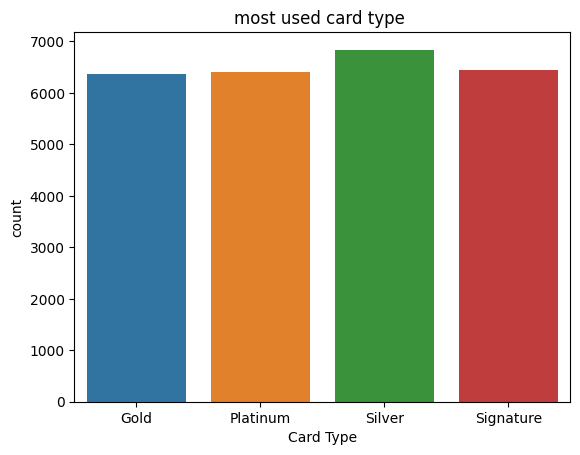

In [15]:
sns.countplot(x=df["Card Type"],data=df)
plt.title("most used card type ")

Text(0.5, 1.0, 'purpose of the card use')

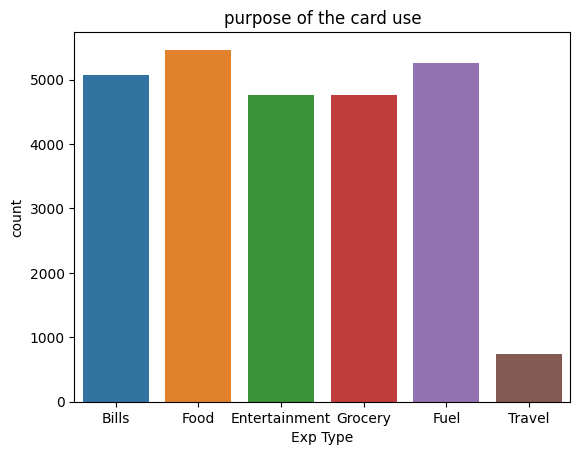

In [16]:
sns.countplot(x=df["Exp Type"],data=df)
plt.title("purpose of the card use")

Text(0.5, 1.0, 'who has more purchase power')

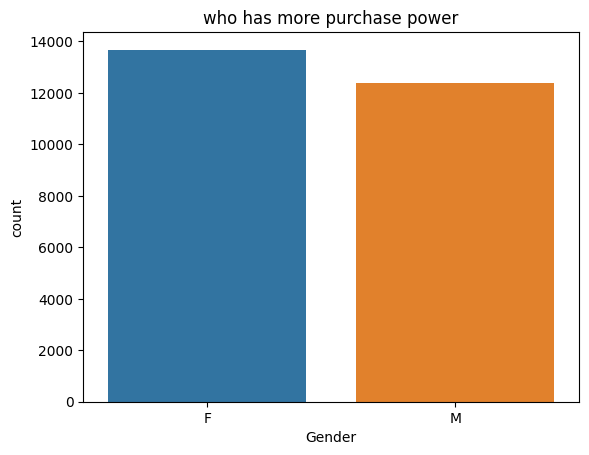

In [17]:
sns.countplot(x=df["Gender"],data=df)
plt.title("who has more purchase power")

Text(0.5, 1.0, 'which year has more billings')

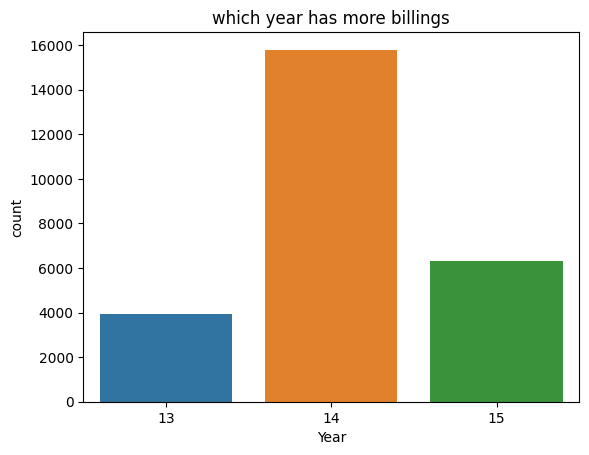

In [18]:
sns.countplot(x=df["Year"],data=df)
plt.title("which year has more billings")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
,  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'distribution of purchases over a year')

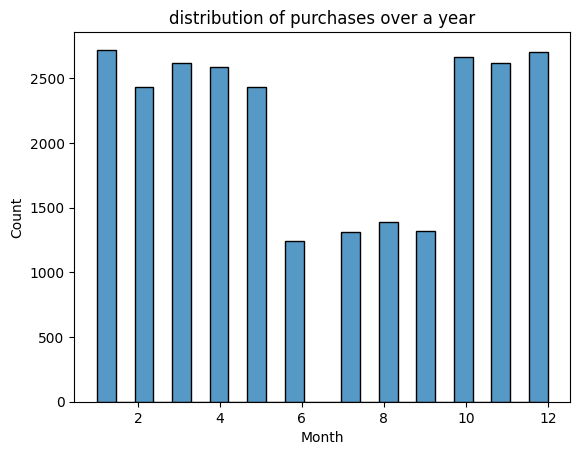

In [19]:
sns.histplot(df["Month"])
plt.title("distribution of purchases over a year")

# bivariate anlaysis

Text(0.5, 1.0, 'Expenses over the types ')

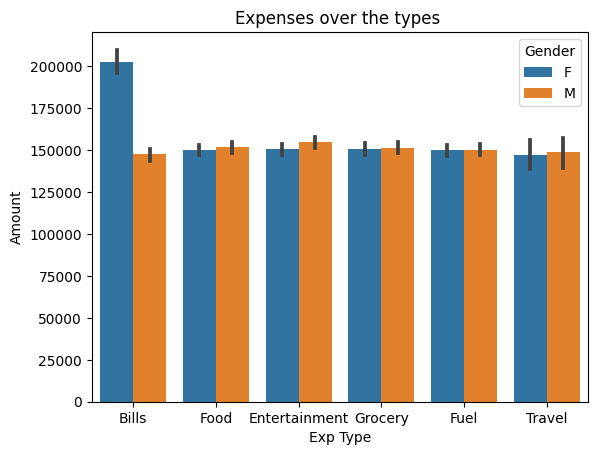

In [20]:
sns.barplot(x=df["Exp Type"],y=df["Amount"],hue="Gender",data=df)
plt.title("Expenses over the types ")

Text(0.5, 1.0, 'Exp Type vs Month ')

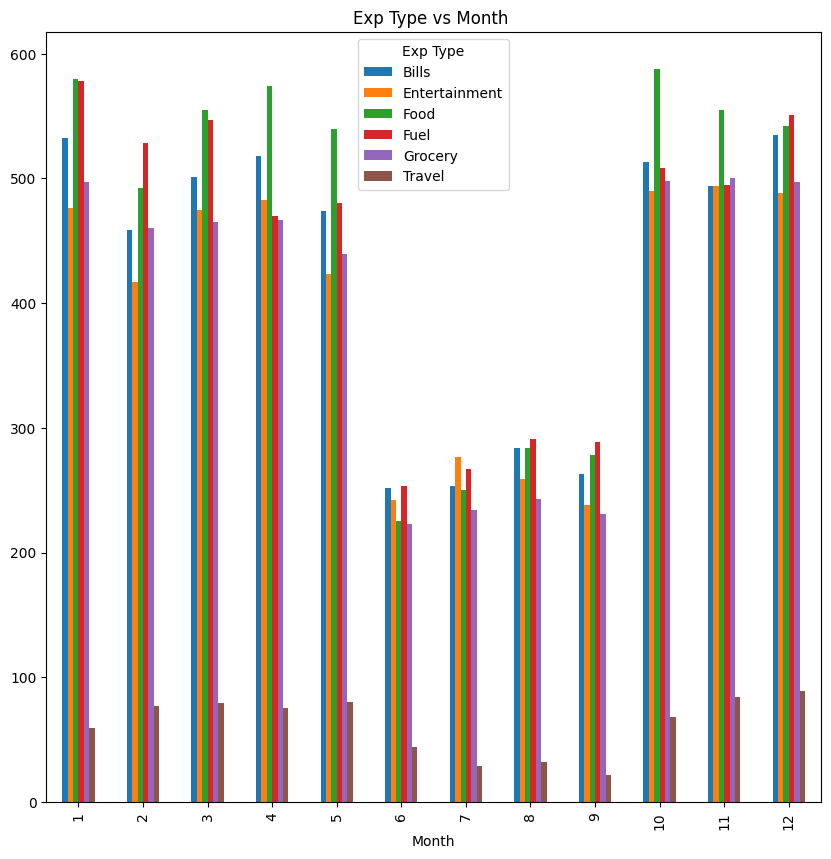

In [21]:
grouped=df.groupby("Month")["Exp Type"].value_counts().unstack()
grouped.plot(kind="bar",figsize=(10,10))
plt.title("Exp Type vs Month ")

Text(0.5, 1.0, 'Expenses over different type of cards ')

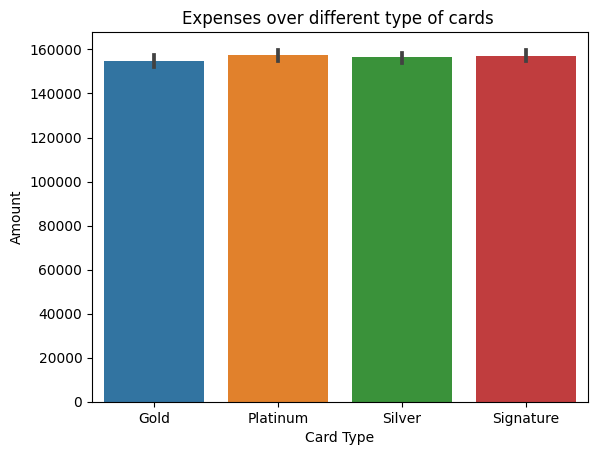

In [22]:
sns.barplot(x=df["Card Type"],y=df["Amount"],data=df)
plt.title("Expenses over different type of cards ")

# conclusion

1.expenses over very card is same 

2.females are spending more 

3.used to pay bills and food (most likely)

4.usage is less in between the 6-9 months